<a href="https://colab.research.google.com/github/Rohan1-tech/Hotel-booking-analysis/blob/main/Copy_of_Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering_ByRohan_pagare_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised ML - Netflix Movies and TV Shows Clustering

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

Github link :


## Problem statement
Netflix is one of the world's leading entertainment services with over 260 million paid memberships in over 190 countries enjoying TV series, films and games across a wide variety of genres and languages. Netflix is the most-subscribed video on demand streaming media service, with 260.28 million paid memberships in more than 190 countries as of January 2024.

It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.





# **Project goals**
In this project, you are required to do

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. If Netflix has been increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features






## Dataset description

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genre

12. description: The Summary description

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Loading dataset

In [ ]:
df = pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
                 ,engine = "python"
                 ,encoding = "ISO-8859-1")

In [ ]:
# reading data
path = '/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

original_df = pd.read_csv(path,index_col='show_id')
df = original_df.copy()

## Overview of dataset

In [ ]:
# Retrieve the first few rows of the DataFrame to inspect its structure and contents
df.head()

type  title           director  \
show_id                                      
s1       TV Show     3%                NaN   
s2         Movie   7:19  Jorge Michel Grau   
s3         Movie  23:59       Gilbert Chan   
s4         Movie      9        Shane Acker   
s5         Movie     21     Robert Luketic   

                                                      cast        country  \
show_id                                                                     
s1       João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
s2       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
s3       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
s4       Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
s5       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

                date_added  release_year rating   duration  \
show_id                                                      
s1         August 14, 2020          2020  TV-MA  4 Seasons   
s2       December 23, 2016          2016  TV-MA     93 min   
s3       December 20, 2018          2011      R     78 min   
s4       November 16, 2017          2009  PG-13     80 min   
s5         January 1, 2020          2008  PG-13    123 min   

                                                 listed_in  \
show_id                                                      
s1       International TV Shows, TV Dramas, TV Sci-Fi &...   
s2                            Dramas, International Movies   
s3                     Horror Movies, International Movies   
s4       Action & Adventure, Independent Movies, Sci-Fi...   
s5                                                  Dramas   

                                               description  
show_id                                                     
s1       In a future where the elite inhabit an island ...  
s2       After a devastating earthquake hits Mexico Cit...  
s3       When an army recruit is found dead, his fellow...  
s4       In a postapocalyptic world, rag-doll robots hi...  
s5       A brilliant group of students become card-coun...

In [ ]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame
df.shape

(7787, 12)

## Data cleaning

Data cleaning refers to the process of identifying, correcting, and removing errors, inconsistencies, and inaccuracies in a dataset to improve its quality, reliability, and usability for analysis or other purposes. This process involves tasks such as removing duplicate records, handling missing values, standardizing formats, and resolving discrepancies to ensure that the data is accurate, complete, and consistent. The goal of data cleaning is to prepare the dataset for further analysis or application while minimizing the risk of errors or biases that could lead to incorrect conclusions or decisions.






In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicate rows
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Check if there are any missing values
if missing_values.sum() > 0:
    print("Missing values found:")
    print(missing_values)
else:
    print("No missing values found.")


No missing values found.


<Axes: ylabel='show_id'>

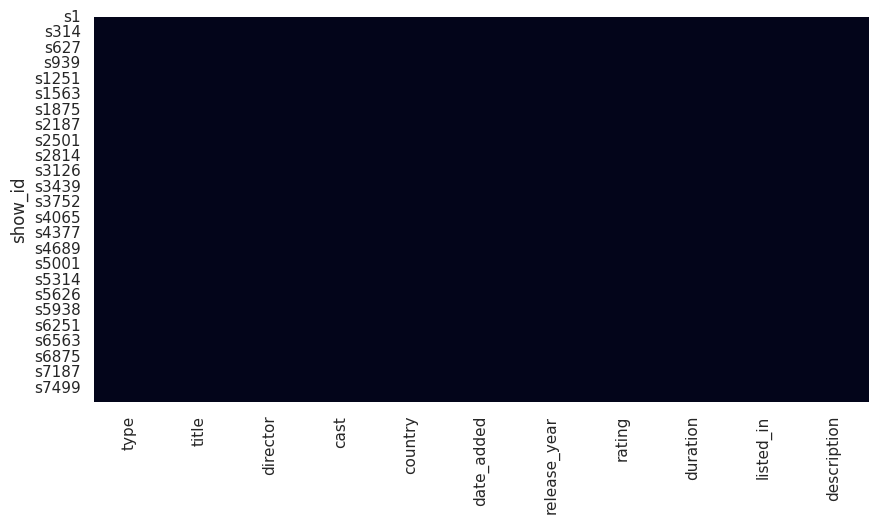

In [ ]:
#Visualizing the missing values with the help of heat map
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
# Checking the unique values in each attribute of the dataset
df.nunique()

type               2
title           7777
director        4050
cast            6822
country           82
date_added      1512
release_year      73
rating            14
duration         216
listed_in         36
description     7759
dtype: int64

### Handling the missing values

In [ ]:
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(7777, 11)

### Country, listed_in:

In [ ]:
#Top countries
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
#Genre of the shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.

Also, let's consider only the primary genre of the respective movie / TV show.







In [ ]:
#Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])


In [ ]:
#contry in which a movie was produced
df.country.value_counts()


United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

### Typecasting 'duration' from string to integer

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x : int(x.split()[0]))

In [ ]:
# Number of seasons for tv shows
df[df['type'] == 'TV Show'].duration.value_counts()


1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [ ]:
# Movie length in minutes
df[df['type'] == 'Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [ ]:
# Datatype of duration
df.duration.dtype

dtype('int64')

Successfully converted the datatype of duration column to int.

### Typecasting 'date_added' from string to datetime:

In [ ]:
# Typecasting 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [ ]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

## Rating:

<Axes: xlabel='rating', ylabel='count'>

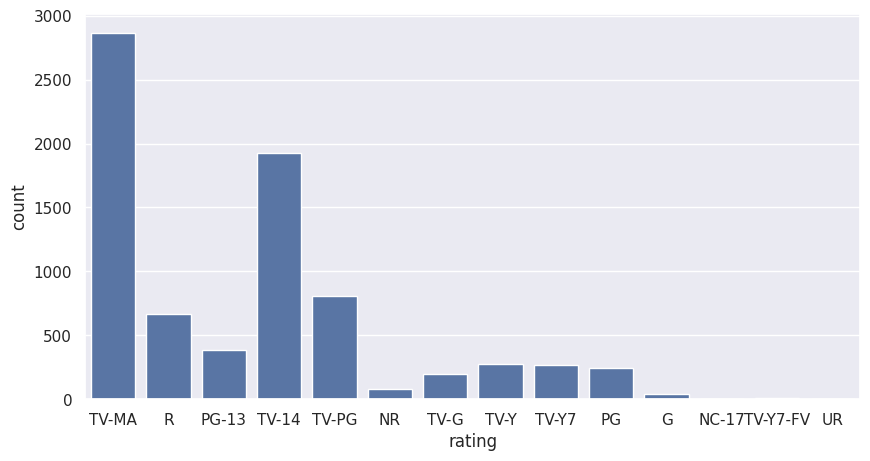

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize = (10,5))
sns.countplot(x='rating', data=df)

Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG.

In [ ]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

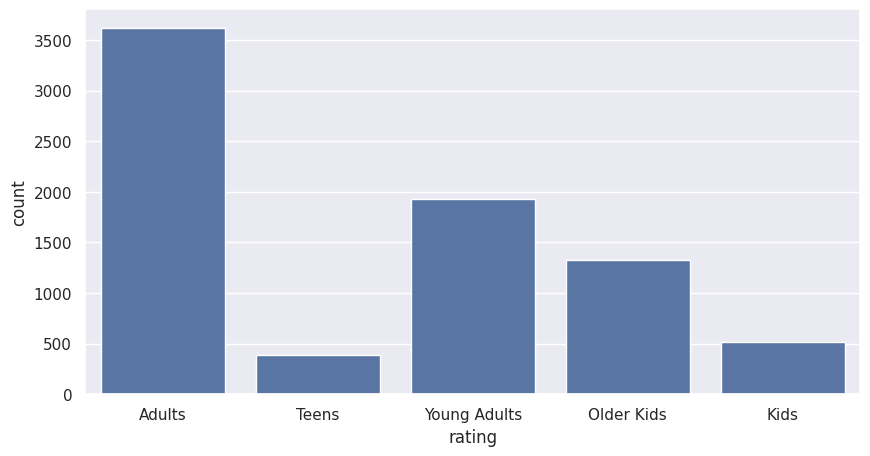

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

Most shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

# Exploratory data analysis

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often employing visual methods. Its primary goal is to gain insights into the data, identify patterns, trends, anomalies, and relationships between variables. EDA helps researchers or analysts understand the underlying structure of the data and formulate hypotheses for further investigation.

### Univariate analysis

Involves analyzing a single variable at a time to understand its distribution, central tendency, dispersion, and other summary statistics.

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

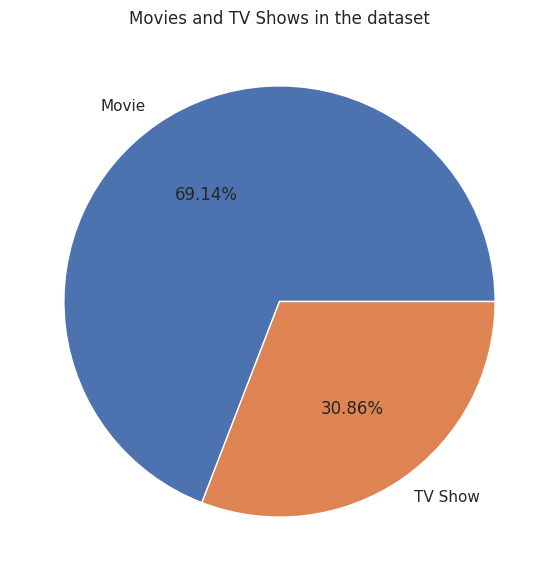

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

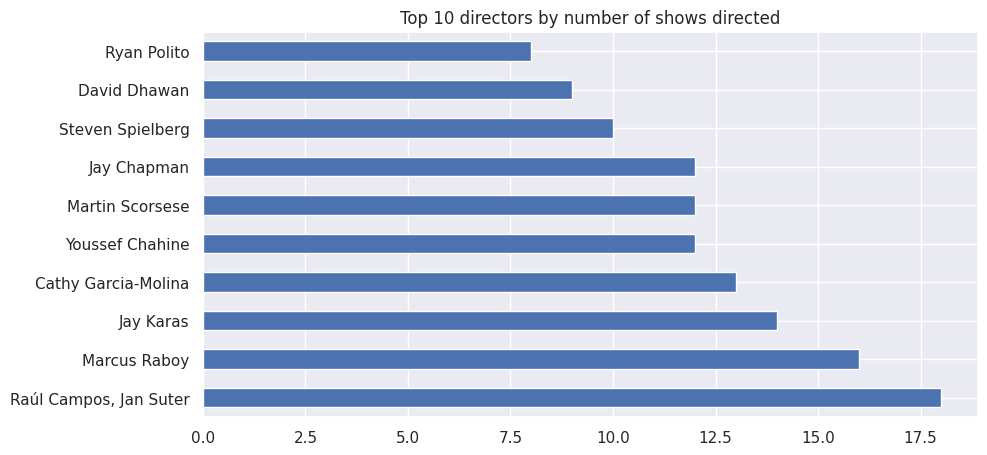

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

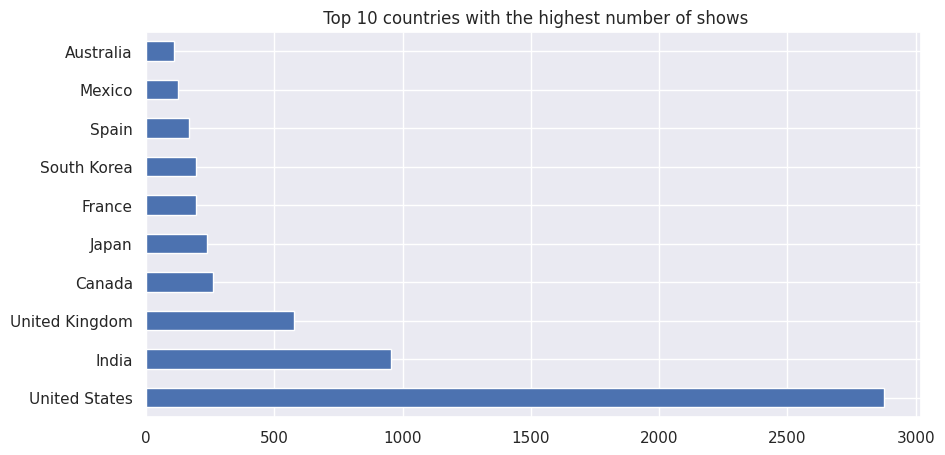

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

The United States boasts the highest count of movies and TV shows, with India and the UK following closely behind.

In [ ]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [ ]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100


78.32068921177832

The top three countries collectively contribute to approximately 56% of all movies and TV shows within the dataset, while this proportion escalates to around 78% for the top ten countries.

Text(0.5, 1.0, 'distribution by released year')

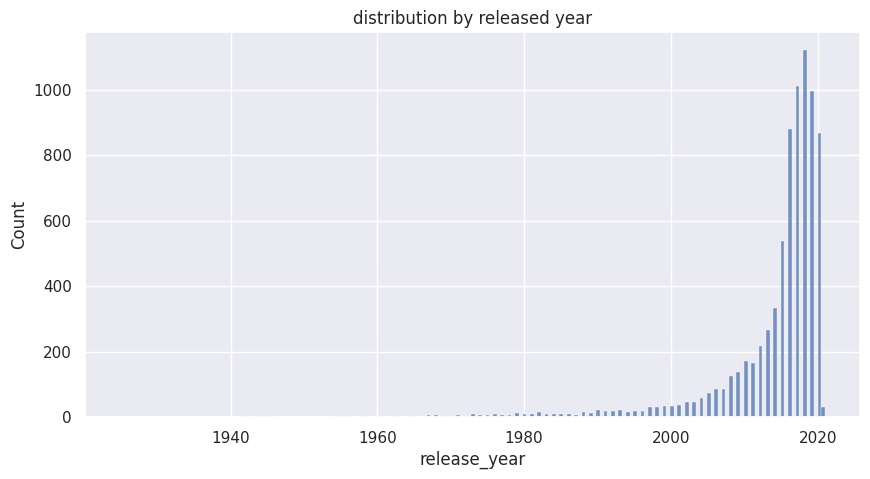

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

The histogram illustrates the distribution of movie and TV show release years, with a noticeable increase in the number of releases after 2000. Peaks indicate periods of higher production or favored eras, while gaps may suggest shifts in content creation or dataset coverage. Understanding these patterns aids in strategic content planning and audience targeting for platforms like Netflix.

Text(0.5, 1.0, 'top 10 genres')

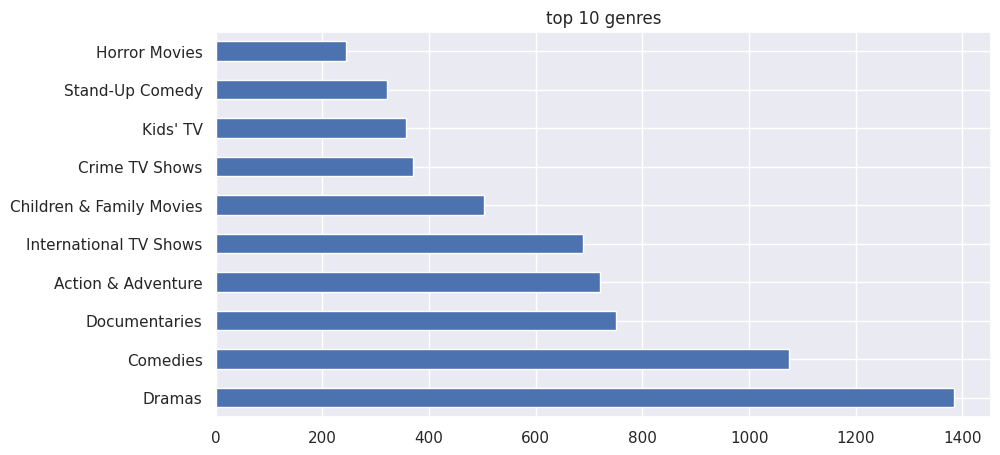

In [ ]:
# Top 10 genres
plt.figure(figsize = (10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('top 10 genres')

In [ ]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [ ]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

The visualization depicts the top 10 genres based on their frequency within the dataset. Notably, dramas emerge as the most prevalent genre, closely followed by comedies and documentaries. Collectively, these three genres constitute approximately 41% of all movies and TV shows in the dataset. Furthermore, the dominance of these genres becomes even more pronounced among the top 10, encompassing around 82% of the total content. This highlights a clear preference for these genres among viewers, underscoring their significance in content consumption trends.

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

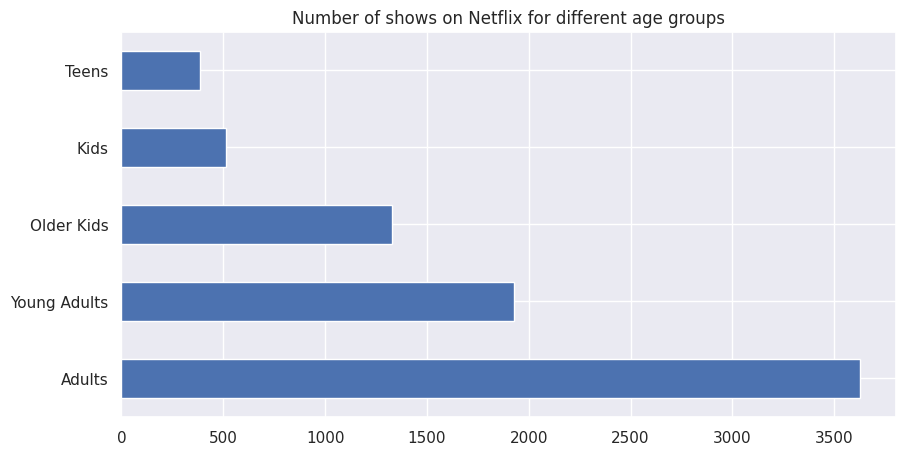

In [ ]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

The majority of the shows on Netflix are catered to the needs of adult and young adult population.

## Bivariate analysis

 Focuses on analyzing the relationship between two variables to uncover patterns, correlations, or associations.

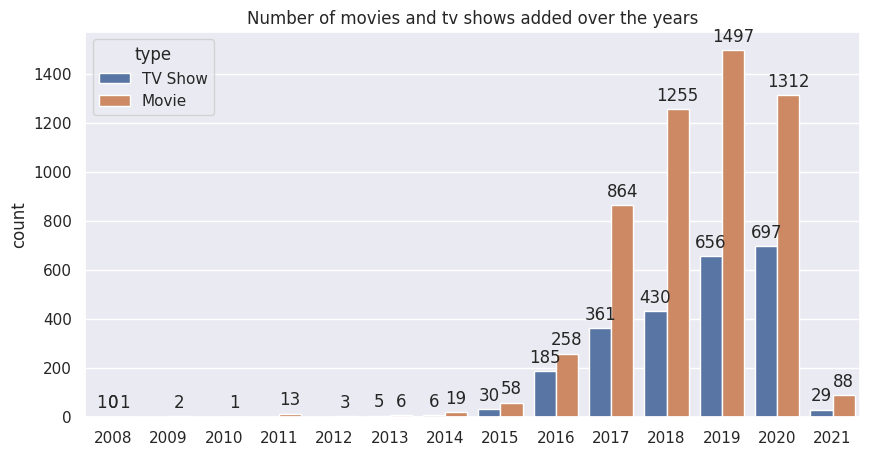

In [ ]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p=sns.countplot(x='year_added', data=df, hue='type')
plt.title('Number of movies and tv shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


Over the years, Netflix has maintained a consistent emphasis on expanding its library of shows on its platform. While there was a decline in the number of movies added in 2020, a similar trend was not observed in the addition of TV shows during the same period. This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

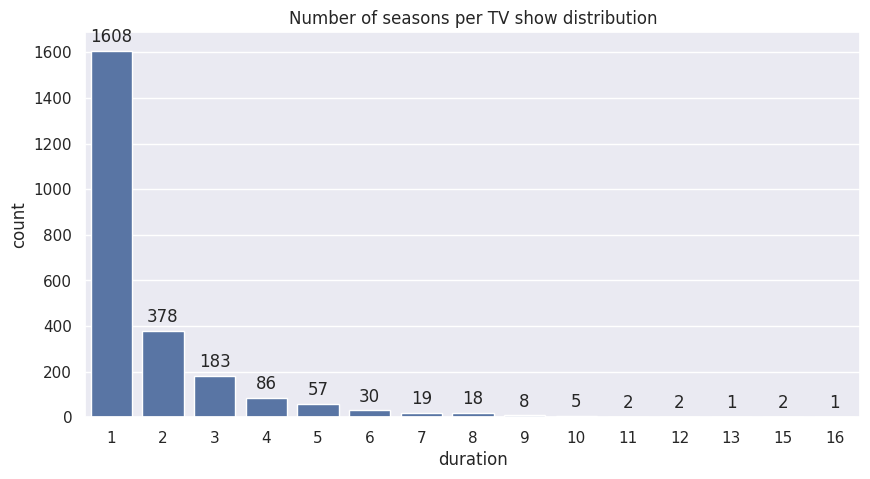

In [ ]:
# Seasons in each TV show
plt.figure(figsize = (10,5))
p = sns.countplot(x='duration', data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# % of tv shows with just 1 season
len(df[(df['type']== 'TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])*100

67.0

The TV series in the dataset range up to 16 seasons, yet the majority of them consist of only one season. This observation could imply that most TV shows are relatively new, with potential for additional seasons in the future. Additionally, there are very few TV shows with more than 8 seasons.

Text(0.5, 1.0, 'Movie duration distribution')

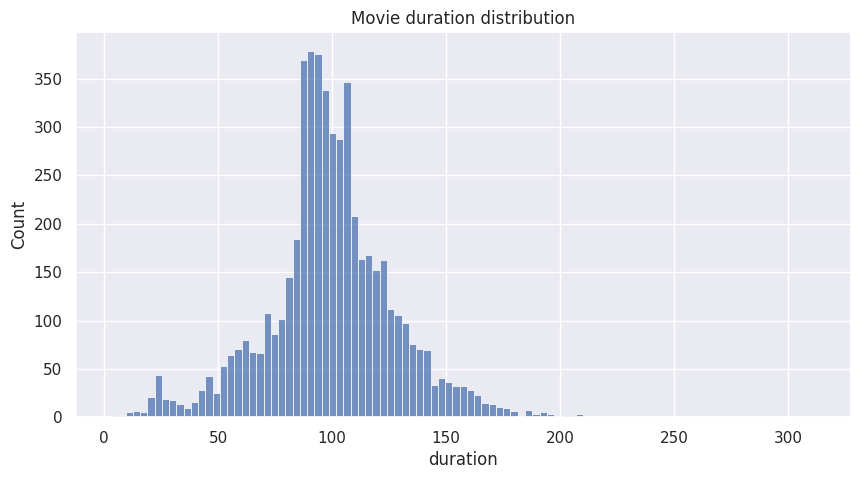

In [ ]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [ ]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

The duration of a movie typically spans from 3 minutes to 312 minutes, exhibiting an almost normal distribution.

Text(0.5, 0, 'Year')

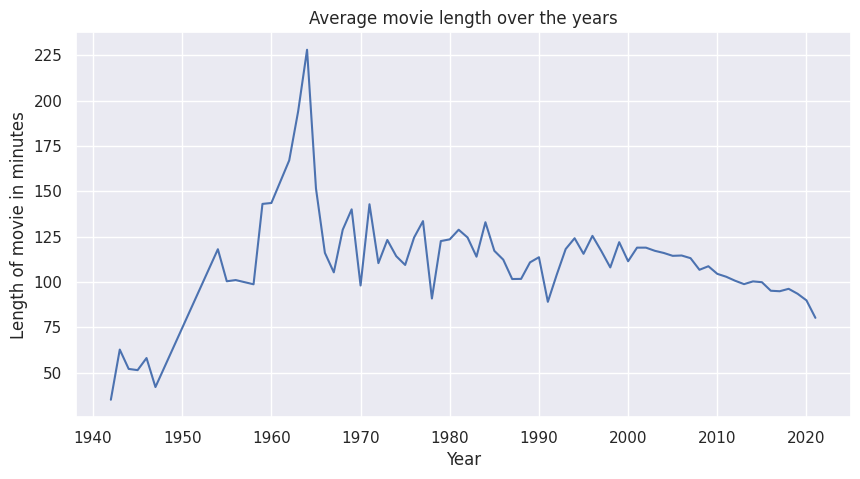

In [ ]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [ ]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Netflix offers a diverse selection of movies, spanning from classics dating back to 1942 to contemporary releases. Interestingly, films from the 1940s tend to have relatively shorter durations, while those from the 1960s boast the longest average lengths. Notably, there has been a consistent decrease in the average movie length since the 2000s.

Text(0.5, 1.0, 'Top 10 genres for movies')

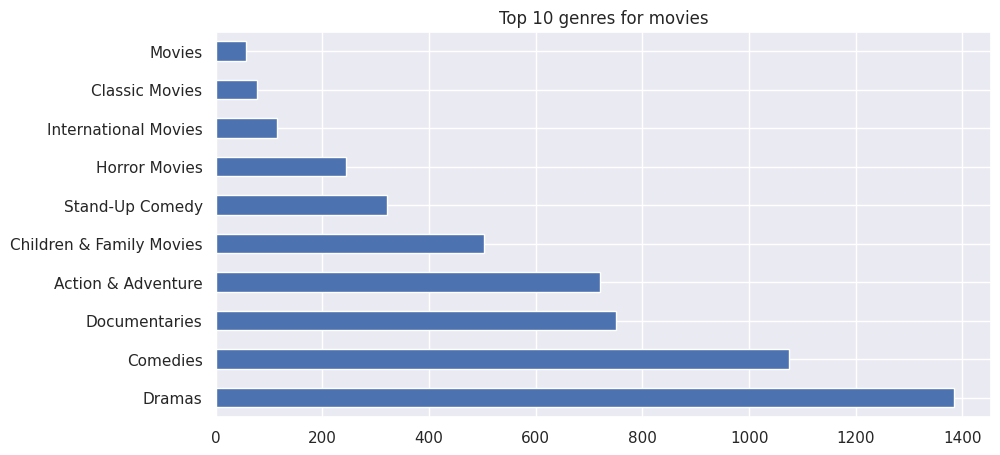

In [ ]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Dramas, comedies, and documentaries stand out as the most favored genres among Netflix's movie collection, reflecting their widespread appeal and popularity among viewers. Whether audiences seek gripping narratives, lighthearted entertainment, or thought-provoking insights, these genres offer a diverse range of cinematic experiences to suit varied tastes and preferences on the streaming platform.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

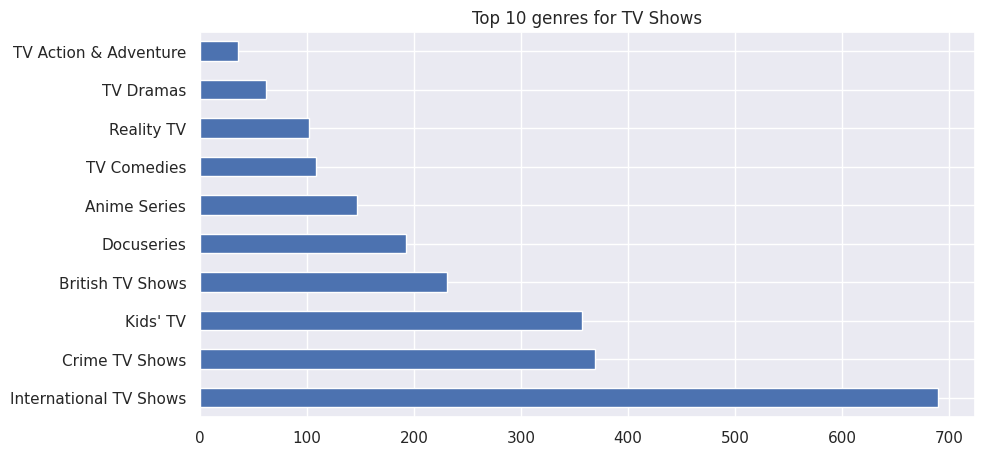

In [ ]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

International, crime, and kids' genres prominently feature among the most sought-after categories for TV shows on Netflix, resonating strongly with viewers across diverse demographics. From gripping international dramas to thrilling crime series and engaging content tailored for younger audiences, these genres offer a captivating array of viewing options that cater to a wide spectrum of preferences and interests on the streaming platform.






Text(0.5, 1.0, 'Top 10 movie directors')

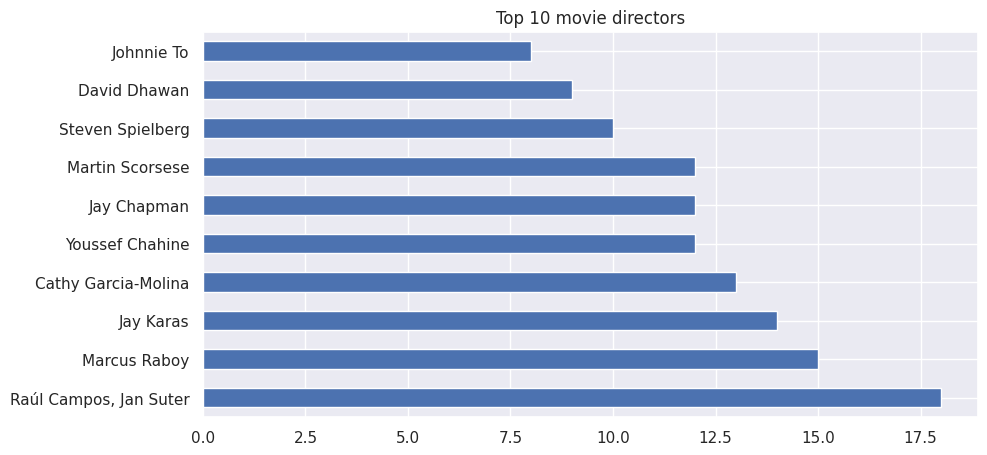

In [ ]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Raul Campos and Jan Suter hold the record for co-directing a remarkable total of 18 movies together, surpassing any other duo in this aspect. Following closely behind are Marcus Roboy, Jay Karas, and Cathy Garcia-Molina.

Text(0.5, 1.0, 'Top 10 TV show directors')

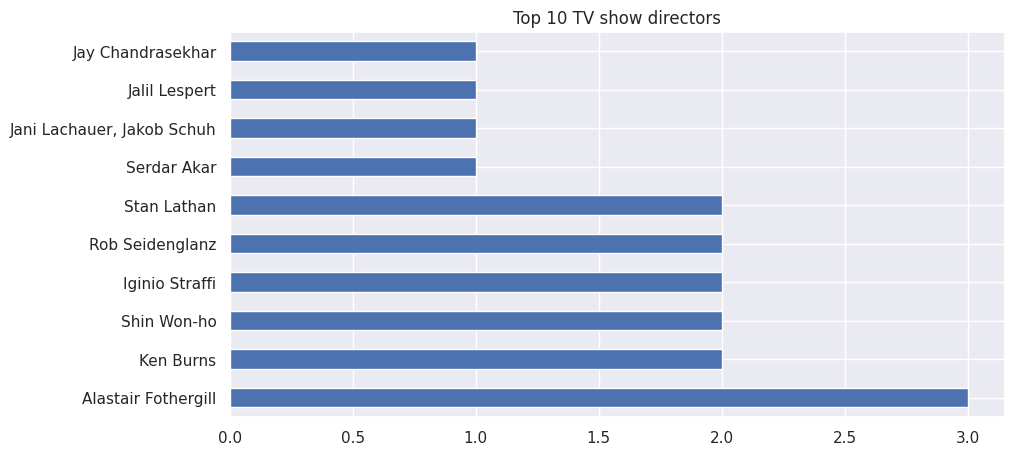

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

Alastair Fothergill leads with the distinction of directing three TV shows, marking the highest count among all directors. Additionally, only a select group of six directors have helmed more than a single television show.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

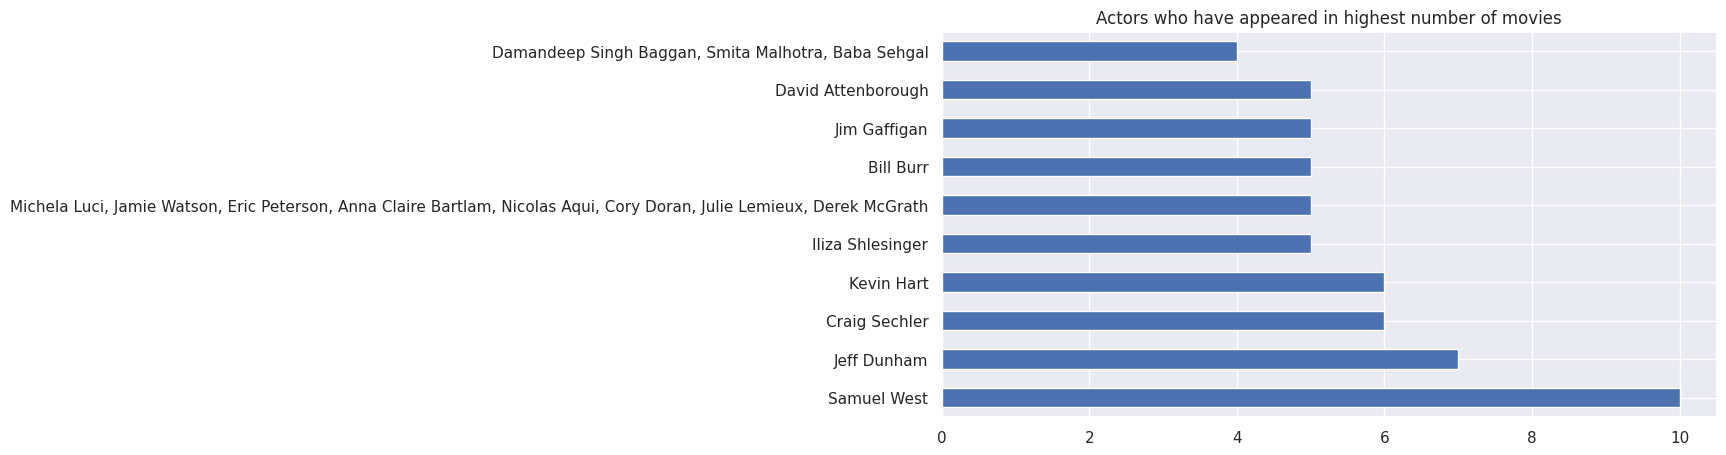

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

Samuel West boasts an impressive presence in 10 movies, securing the top spot, closely followed by Jeff Dunham, who has graced the screen in 7 films.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

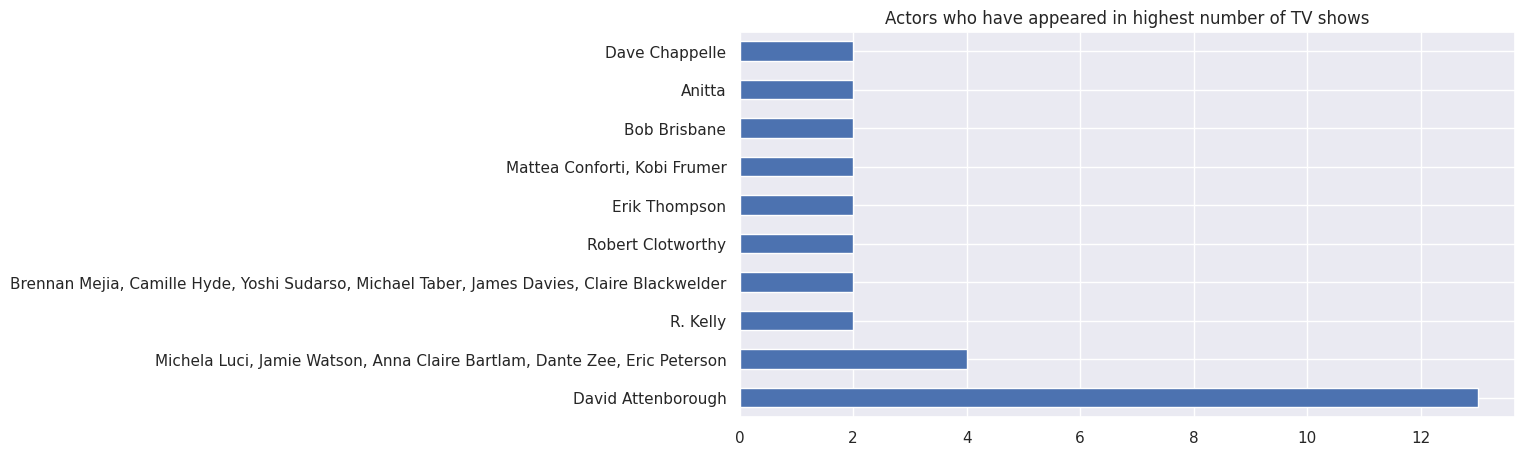

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

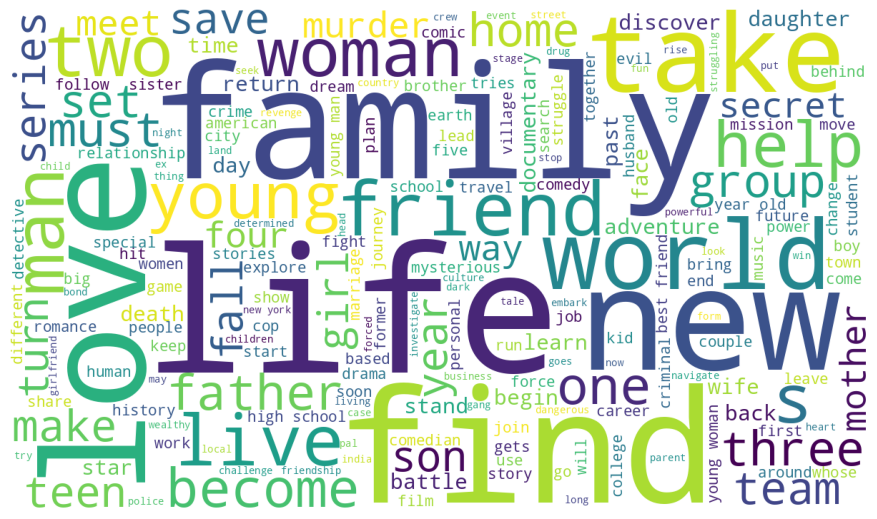

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

A collection of significant keywords commonly found in Netflix show descriptions, ideal for generating a word cloud, includes: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, and secret.

# Data preprocessing



Data preprocessing is a fundamental step in data analysis and machine learning pipelines. It involves transforming raw data into a clean, organized, and suitable format for further analysis or modeling. The primary objectives of data preprocessing are to enhance data quality, resolve inconsistencies, reduce noise, and prepare the data for analysis or modeling tasks.

### Modeling Approach

1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
7. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
8. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.



We will cluster the shows on Netflix based on the following attributes:

Director

Cast

Country

Listed in (genres)

Description

In [ ]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = original_df.copy()

In [ ]:
df1.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])

In [ ]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

We have successfully added all the necessary data into a single column

### Removing non-ASCII characters

ASCII (American Standard Code for Information Interchange). Non-ASCII characters are often represented using different encoding schemes, such as UTF-8 (Unicode Transformation Format 8-bit), which supports a wider range of characters compared to ASCII encoding.

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

We have successfully removed all non-ascii characters from the corpus.

## Remove stopwords and lower case:

Stopwords are commonly used words in natural language that are often filtered out or ignored during text processing and analysis because they typically do not carry significant meaning or context.

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

We have successfully removed all the stopwords and converted the corpus to lowercase.

## Remove punctuations

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

We have successfully dropped all the punctuation marks from the corpus.

## Lemmatization:

 Lemmatization is often used as a preprocessing step in natural language processing (NLP) tasks to normalize text data. Lemmatization helps reduce words to their base or dictionary form (lemmas), which can improve the performance of ML models by reducing the vocabulary size and capturing the essential meaning of words.

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

We have lemmatized the corpus.

## Tokenization

Tokenization is the process of breaking down a sequence of text into smaller units, called tokens. These tokens can be words, phrases, symbols, or other meaningful elements, depending on the context and the task at hand.

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

The corpus is converted to tokens.

## Vectorization

Vectorization is the process of converting data into numerical vectors or arrays, enabling mathematical operations and analysis. It's a fundamental step in preparing data for machine learning algorithms that typically require numerical input.

In [ ]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 235288 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of X
X.shape

(7787, 20000)

In [ ]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# convert X into array form for clustering
X = X.toarray()

### Dimensionality reduction using PCA

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

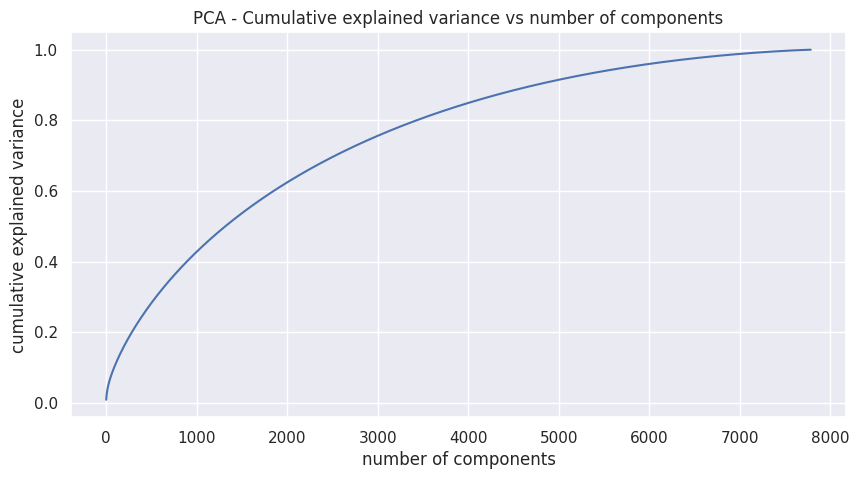

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We find that 100% of the variance is explained by about ~7500 components.

Also, more than 80% of the variance is explained just by 4000 components.

Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

We have successfully reduced the dimensionality of data using PCA.

## Clusters implementation

### K-Means Clustering

Building clusters using the K-means clustering algorithm.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'WCSS')

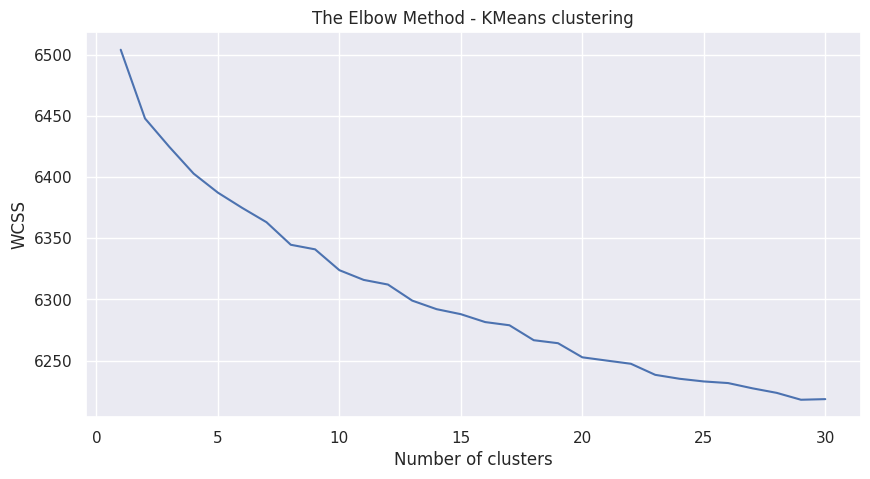

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

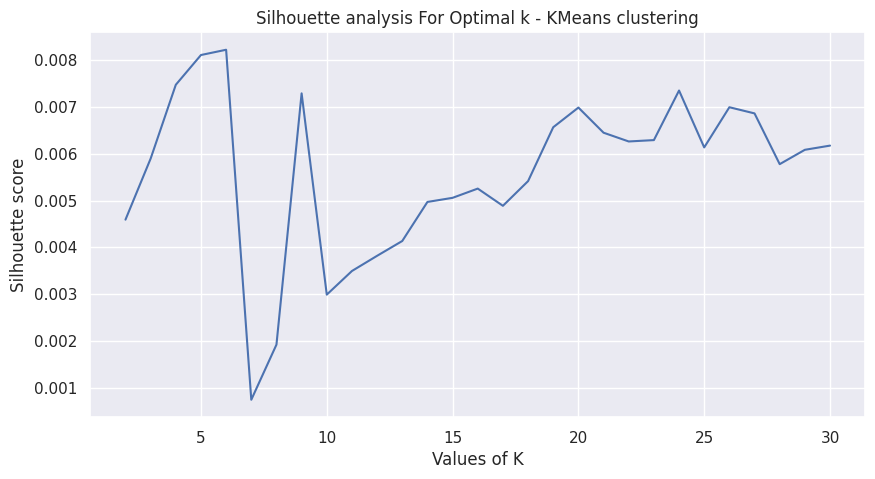

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 6 clusters.

Building 6 clusters using the k-means clustering algorithm:

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6374.780433241613, 0.008224786779748899)


In [ ]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

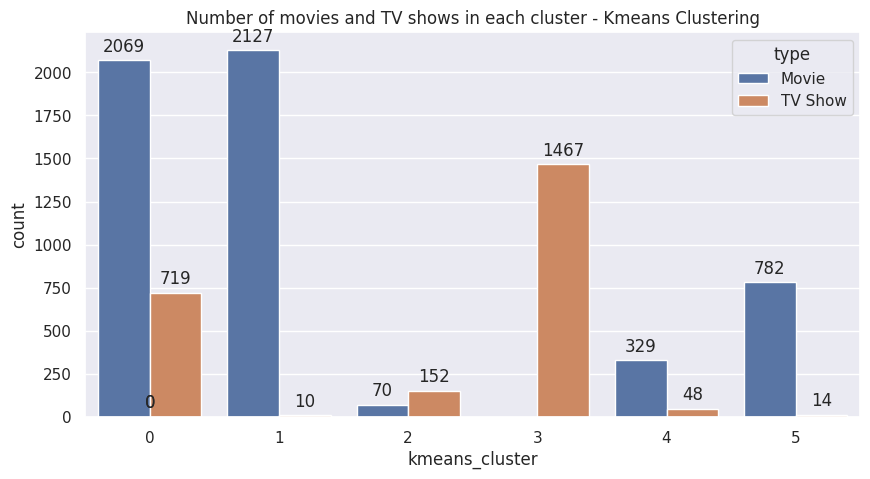

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Successfully built 6 clusters using the k-means clustering algorithm.

### Building wordclouds for different clusters built

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                   stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

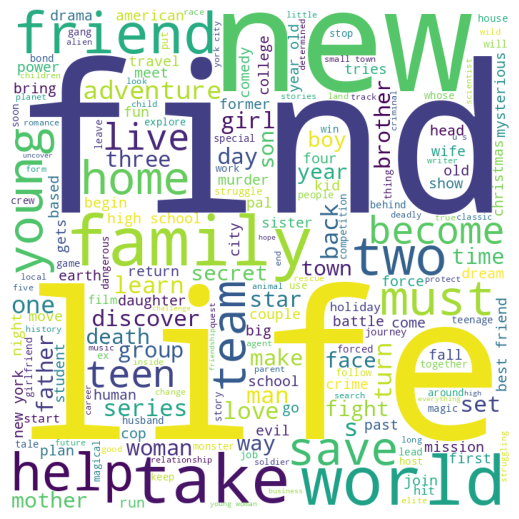

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

Keywords observed in cluster 0: life, new, family, friend, save, help, discover, home, teen

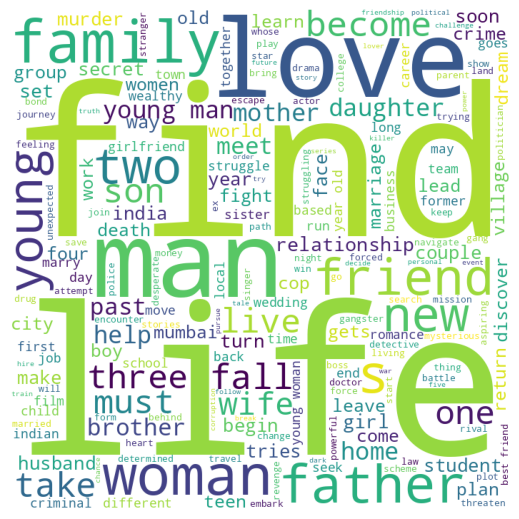

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter

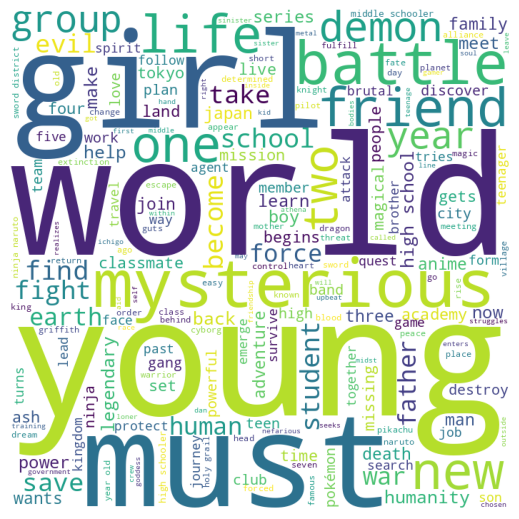

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

Keywords observed in cluster 2: young, world, girl, mysterious, humanity, life, student, school, battle, demon, force

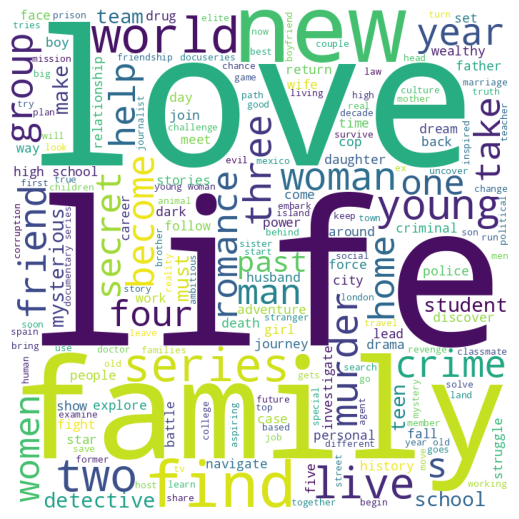

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

Keywords observed in cluster 3: love, life, family, romance, crime, murder, world, adventure

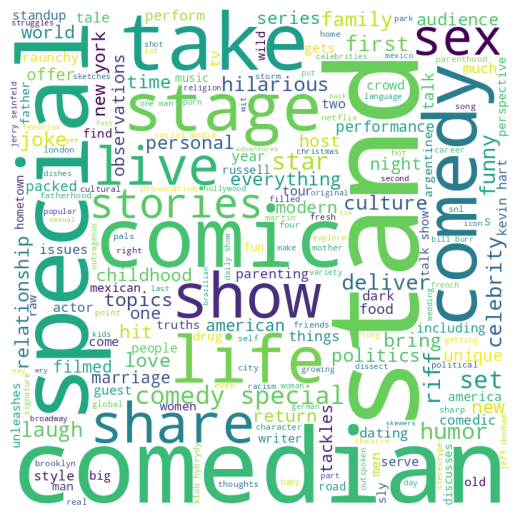

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

Keywords observed in cluster 4: comedian, special, stand, comic, stage, sex, joke

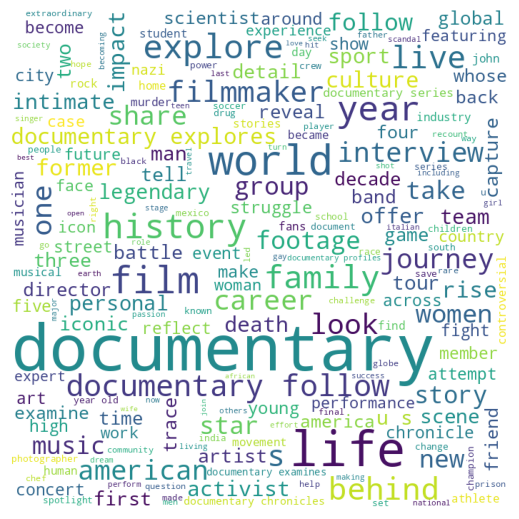

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life

### Hierarchical clustering

Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

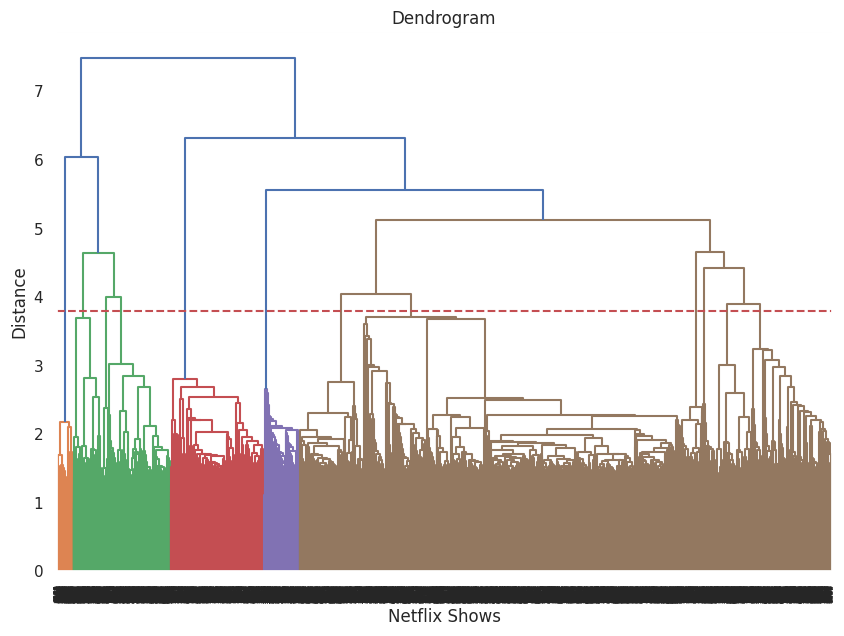

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

Building 12 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([3, 5, 1, ..., 4, 2, 4])

In [ ]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

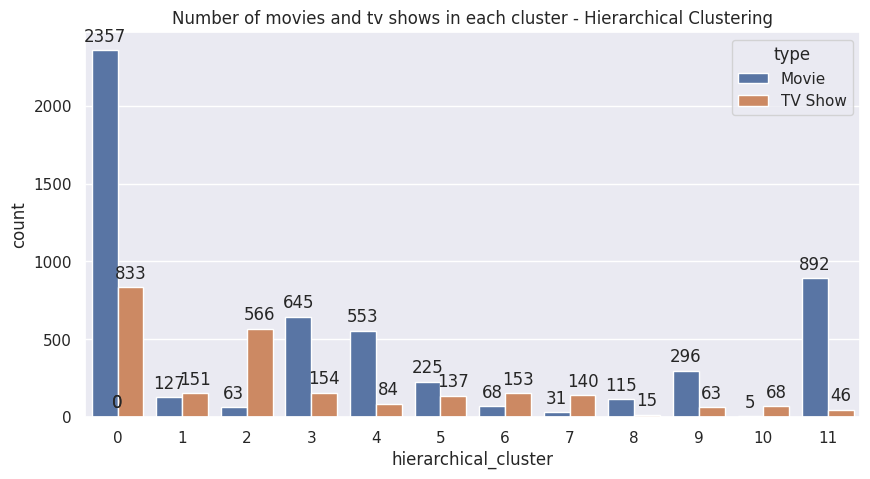

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

### Building wordclouds for different clusters built

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

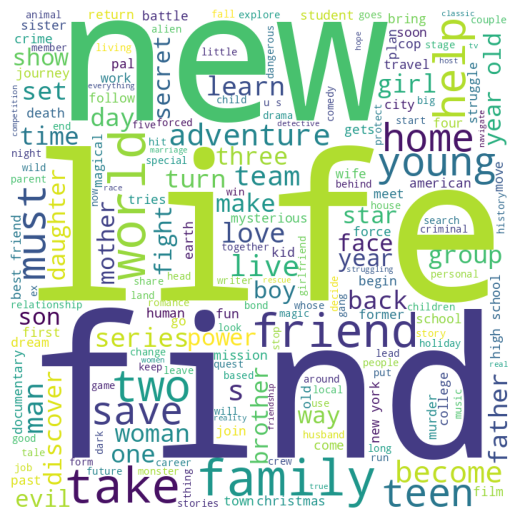

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

Keywords observed in cluster 0: life, new, find, family, save, friend, young, teen, adventure

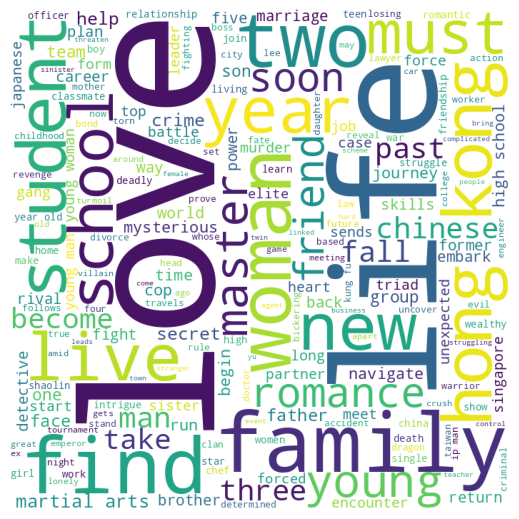

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

Keywords observed in cluster 1: love, family, life, student, romance, school, woman, master, father

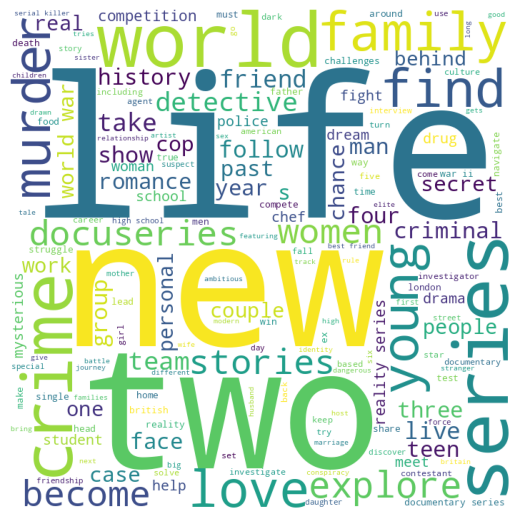

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

Keywords observed in cluster 2: life, new, series, crime, world, murder, history, detective

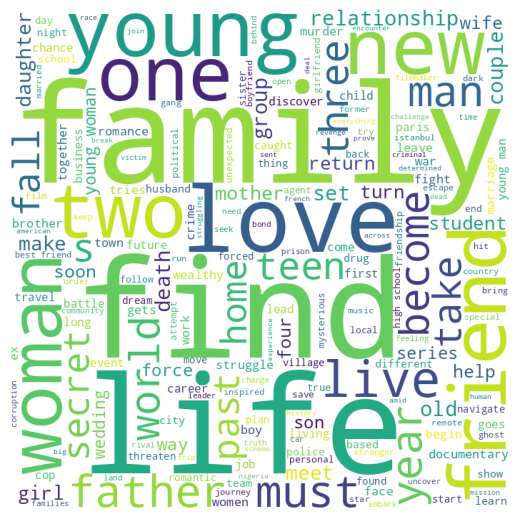

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

Keywords observed in cluster 3: family, life, love, friend, teen, woman, man, young, world, wedding, secret

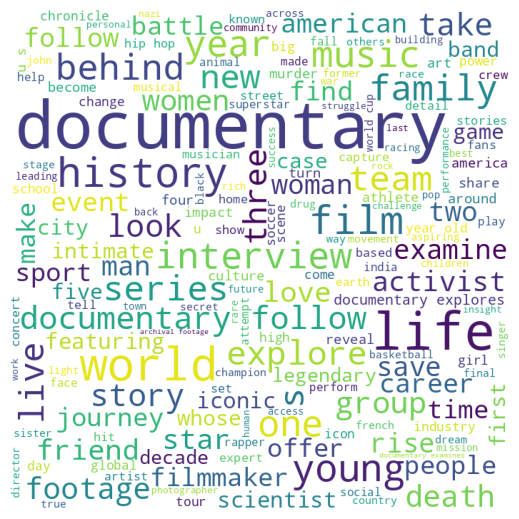

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

Keywords observed in cluster 4: documentary, music, world, team, interview,history, family, career, battle, death

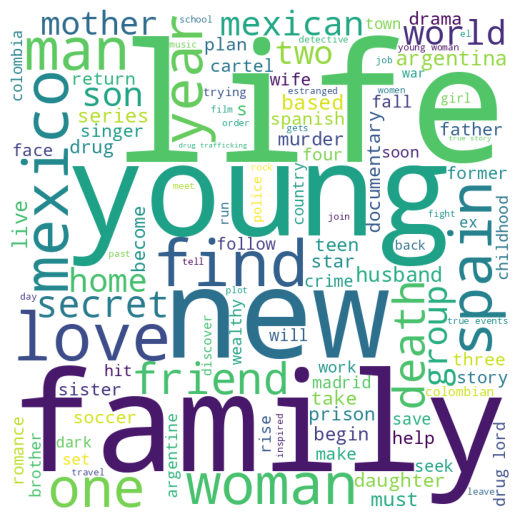

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

Keywords observed in cluster 5: family, life, mexico, young, new, woman, man, secret, spain, death, singer

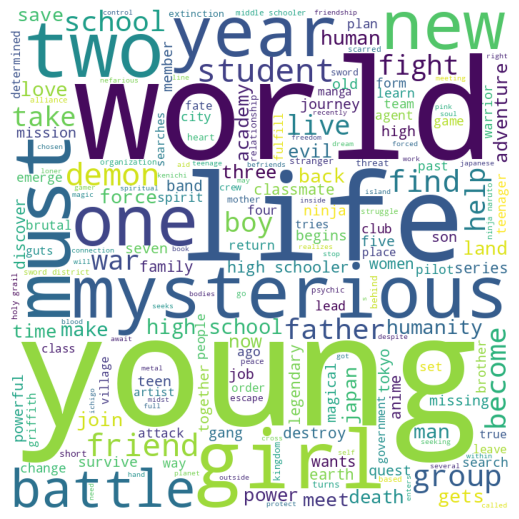

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

Keywords observed in cluster 6: young, life, girl, world, friend, mysterious, demon, student, school, father

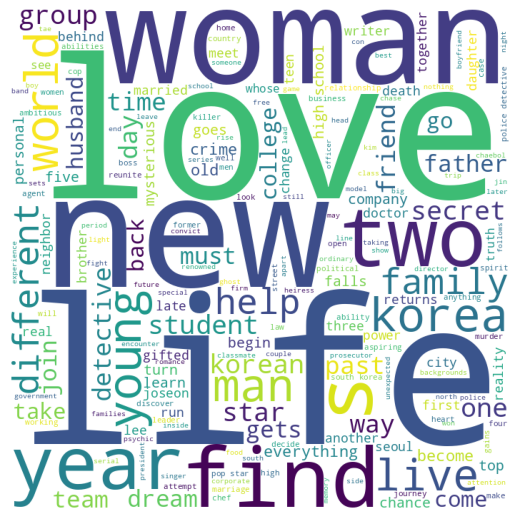

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

Keywords observed in cluster 7: love, life, woman, new, student, family, korea, secret, detective, young

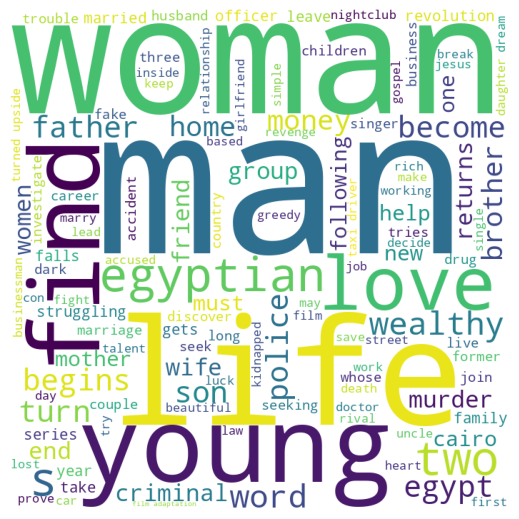

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

Keywords observed in cluster 8: woman, man life, egypt, wealthy, money, young, love, revolution, struggling

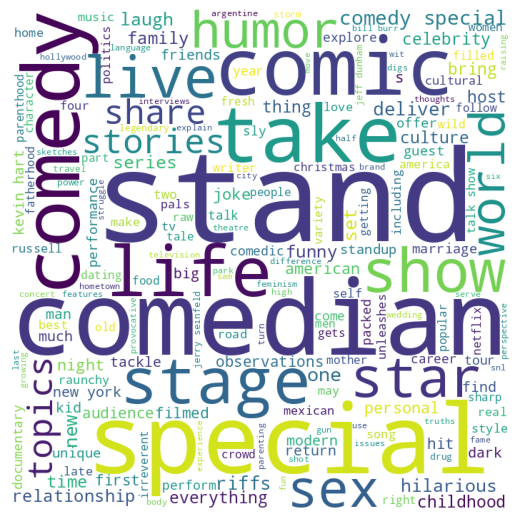

In [ ]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

Keywords observed in cluster 9: comedian, stand, life, comic, special, show, live, star, stage, hilarious, stories

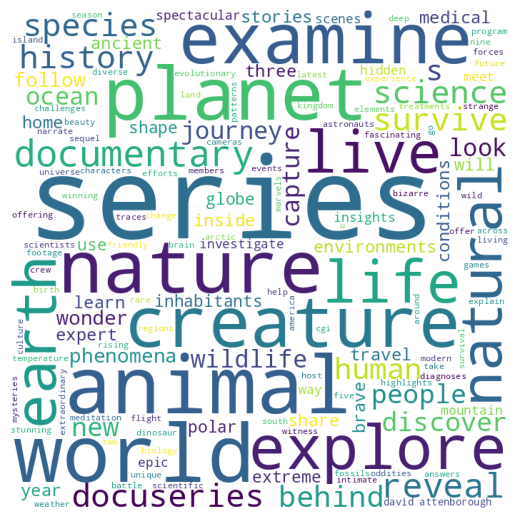

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

Keywords observed in cluster 10: animal, nature, explore, planet, species, survive, natural, life, examine, earth

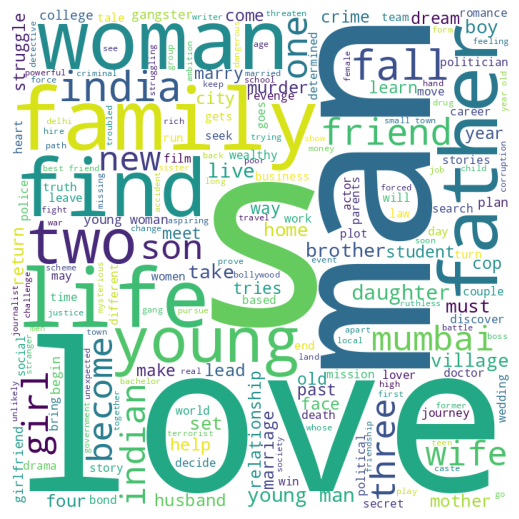

In [ ]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

Keywords observed in cluster 11: love, man, woman, india, father, friend, girl, mumbai, city, learn, young

## Content based recommender system

We can build a simple content based recommender system based on the similarity of the shows.
If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
To get the similarity score of the shows, we can use cosine similarity
The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

In [ ]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [ ]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

(7787, 7787)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['Mr. Sunshine',
 'One Spring Night',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'My Little Baby',
 'Reply 1994',
 'Extracurricular',
 'My Secret Romance',
 'Chef & My Fridge']

In [ ]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Scream',
 'Warrior Nun',
 'Nightflyers',
 'Zombie Dumb',
 'Kiss Me First',
 'The Vampire Diaries']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'London Spy',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'My Hotter Half',
 'The Murder Detectives',
 'I AM A KILLER: RELEASED']

In [ ]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Get Shorty',
 'The Good Cop',
 'Jack Taylor',
 'Better Call Saul',
 'Dramaworld',
 'Father Brown',
 "Marvel's Iron Fist",
 'Young Wallander',
 'No Good Nick']

In [ ]:
# Recommendations for 'XXX'
recommend_10('XXX')

'Invalid Entry'

Invalid because the show 'XXX' is not available on Netflix.

## Conclusions

In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

Through TFIDF Vectorization, we created a total of 20000 attributes.
We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.